In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') 

import random
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r',
           'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired',
           'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn',
           'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma',
           'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring',
           'summer', 'terrain', 'twilight']

In [2]:
c=pd.read_csv("Final_df.csv", nrows = 5000)

In [3]:
c.head()

,YEAR,station_name,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,GEOPOINT
0,2020,29,5558,854,160.0,0,5,99999.0,0,10000.0,28,31.692683
1,2020,17,1702,624,50.0,0,2,22000.0,0,3000.0,27,24.957640
2,2021,19,10854,1213,240.0,0,3,22000.0,0,10000.0,27,17.611436
3,2020,19,1240,1213,30.0,0,1,22000.0,0,4000.0,18,17.611436
4,2020,21,4046,655,270.0,0,2,99999.0,0,9999.0,42,24.553422


In [4]:
c.shape

(5000, 12)

In [5]:
c.groupby('wind_type').count()

,YEAR,station_name,observation_date,elevation,wind_direction_angle,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,GEOPOINT
wind_type,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [6]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  5000 non-null   int64  
 1   station_name          5000 non-null   int64  
 2   observation_date      5000 non-null   int64  
 3   elevation             5000 non-null   int64  
 4   wind_direction_angle  5000 non-null   float64
 5   wind_type             5000 non-null   int64  
 6   wind_speed_rate       5000 non-null   int64  
 7   sky_ceiling_height    5000 non-null   float64
 8   sky_cavok             5000 non-null   int64  
 9   visibility_distance   5000 non-null   float64
 10  air_temperature       5000 non-null   int64  
 11  GEOPOINT              5000 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 468.9 KB


Text(0.5, 1.0, 'Air_temperature regarding to sky cavok')

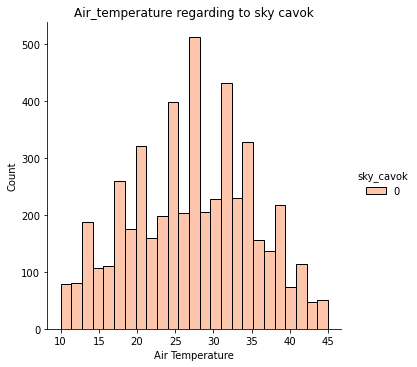

In [7]:
# displot
sns.displot(c, x="air_temperature",hue='sky_cavok',palette=random.choice(pallete))
plt.xlabel("Air Temperature")
plt.ylabel("Count")
plt.title("Air_temperature regarding to sky cavok")

This graph shows the distribution of air temperature relationship to the sky cavok with its ratio on each column to the other as you see. 

The lowest value of temperature is 28 degrees, while The top 3 highest values are in 17, 25, and 23 degrees approximatly.

Text(0.5, 1.0, 'Wind Speed and Air Temperature')

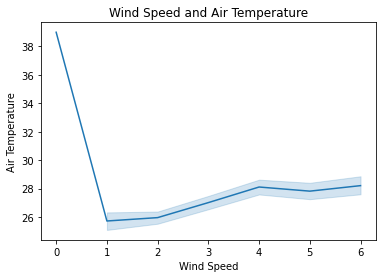

In [8]:
# line plot
sns.lineplot(data=c, x="wind_speed_rate", y="air_temperature",palette=random.choice(pallete))
plt.xlabel("Wind Speed")
plt.ylabel("Air Temperature")
plt.title("Wind Speed and Air Temperature")

On this chart we conclude:
- The highest Average of air_temperature happen at 24.77, when wind_speed value is equal to 4. 
- The lowest Average of air_temperature at 19.97, when wind_speed value is equal to 2.
- Across all 5 wind_speed_rate, Average of air_temperature ranged from 19.97 to 24.77.

Text(0.5, 1.0, 'Air Temperature and wind speed rate to sky_cavok ')

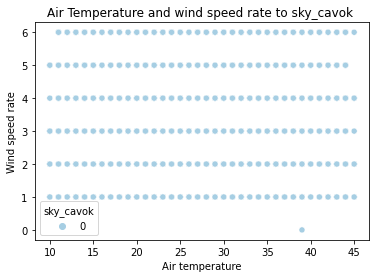

In [9]:
# scatter plot
sns.scatterplot(data=c, x="air_temperature", y="wind_speed_rate", hue='sky_cavok',palette=random.choice(pallete))
plt.xlabel("Air temperature")
plt.ylabel("Wind speed rate")
plt.title("Air Temperature and wind speed rate to sky_cavok ")

This scatter plot shows the air temperature and wind speed rate, And their relationship to the sky cavok, the values are distributed almost randomly, but most of the clear visibility is concentrated on wind speed rate at 2, and most of the Non-clear visibility values are in the wind speed rate at 1.

Text(0.5, 1.0, 'Name of Stations when air_temperature<20 regarding to elevation')

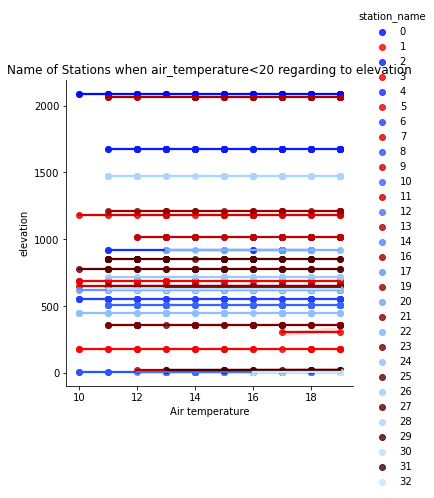

In [10]:
# lmplot
df1 = c.loc[c['air_temperature'] < 20 ] 
lm = sns.lmplot(x='air_temperature', y ='elevation',hue='station_name',data=df1,
                palette=random.choice(pallete))
plt.xlabel("Air temperature")
plt.ylabel("elevation")
plt.title("Name of Stations when air_temperature<20 regarding to elevation")

We can insight here the Name of Stations when air_temperature =20, which is Prince Abdulmajeed bin Abdulaziz Airport, Qaisumah, AlBaha, Taif, Rafha, and Hail.
We can insight from the names of the stations knowing the appropriate plants to plant in each region, or for airports, weather conditions, and flight times.

Text(0.5, 1.0, 'Appropriate plants when air_temperature =20')

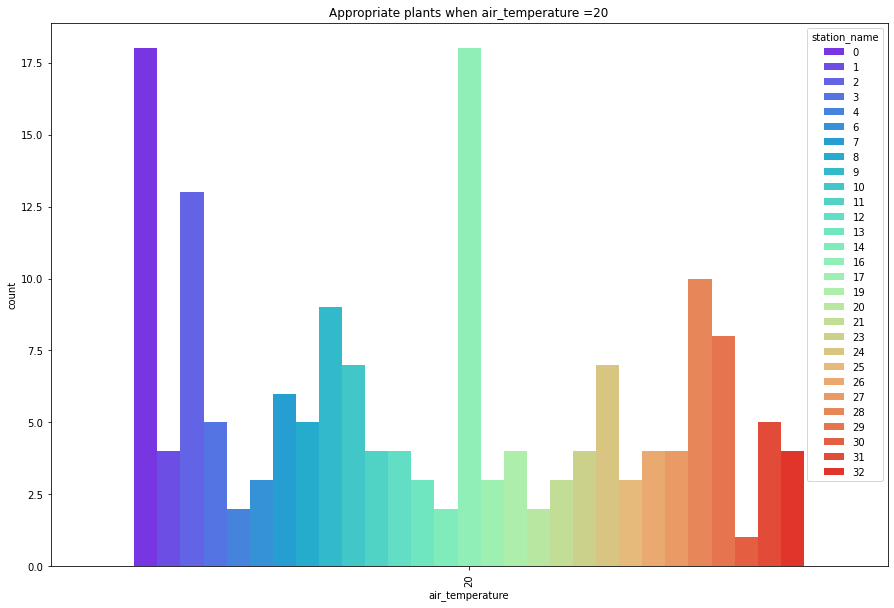

In [11]:
# countplot
df1 = c.loc[c['air_temperature'] ==20 ] 
plt.figure(figsize=(15, 10))
sns.countplot( x="air_temperature", 
               data=df1,hue='station_name', 
               order = df1.groupby(by=['air_temperature'])['station_name'].count().sort_values(ascending=False).index,
               palette=random.choice(pallete))
plt.xticks(rotation=90)
plt.title("Appropriate plants when air_temperature =20")

What this chart interpret is the Name of appropriate plants when air_temperature =20, which are Maize, Wheat, Sorghum, Rice, Millet, Corn, Barley, Cotton, Oats, Peanuts, Potatoes, and Sunflower.

We can insight from the names of the plants knowing which plants are suitable for each temperature and which plant is the most popular and desirable.

Text(0.5, 1.0, 'The relationship between wind_direction_angle and Air Temperature')

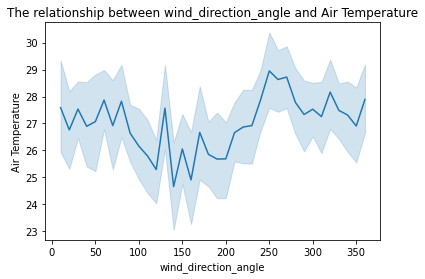

In [12]:
# line plot
sns.lineplot(data=c, x="wind_direction_angle", y="air_temperature", palette=random.choice(pallete))
plt.xlabel("wind_direction_angle")
plt.ylabel("Air Temperature")
plt.title("The relationship between wind_direction_angle and Air Temperature")

On this chart we conclude:
* At 29 air_temperature, 40 wind_direction_angle had the highest Average of air_temperature and was 98.54% higher than 350, which had the lowest Average of air_temperature at 14.61.

* 40 had the highest Average of air_temperature at 29, followed by 10 and 100.
* 350 had the lowest Average of air_temperature at 14.61.

* Across all 28 wind_direction_angle, Average of air_temperature ranged from 14.61 to 29.

Text(0.5, 1.0, 'Boxplot of air_temperature ')

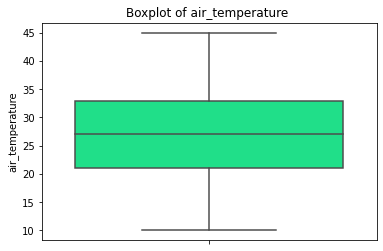

In [13]:
# Boxplot
sns.boxplot(data=c,y="air_temperature",palette=random.choice(pallete))
plt.ylabel("air_temperature")
plt.title("Boxplot of air_temperature ")

This box plot shows the temperature that the maximum temperature is 29 while the minimum temperature is 12 and the median temperature is 22.

Text(0.5, 1.0, 'Violinplot of air_temperature')

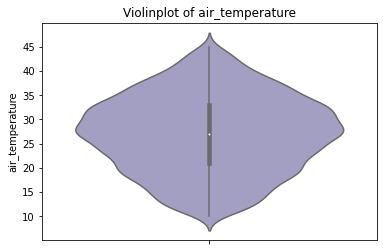

In [14]:
# violinplot
sns.violinplot(data=c,y="air_temperature",palette=random.choice(pallete))
plt.ylabel("air_temperature")
plt.title("Violinplot of air_temperature")

As the violin plot nicely reveals the structure of the data, while a boxplot does not.

This violin plot shows the temperature that the maximum temperature is above 27.5 and the minimum temperature is below 12,5 and the median temperature is 22.5 approximately.

Text(0.5, 1.0, 'Correlation Heatmap')

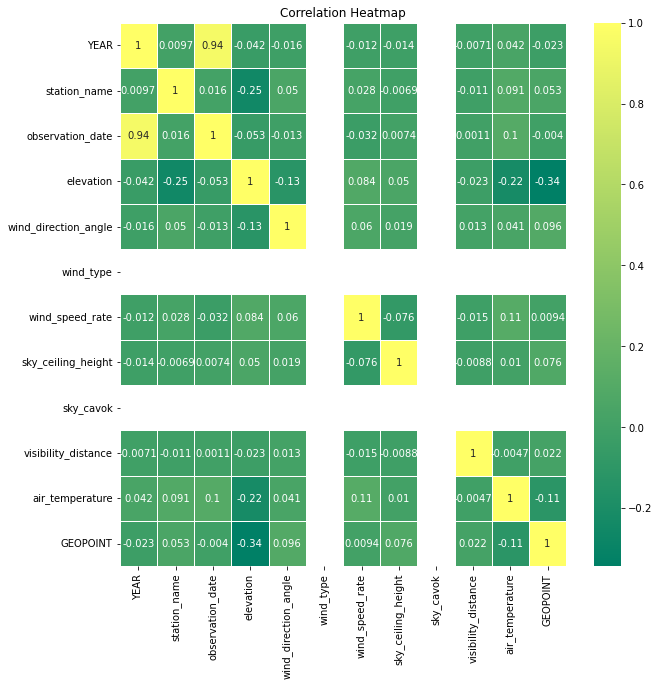

In [15]:
# Heatmap for dataset
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(c.corr(), annot=True, linewidths=.5,ax=ax, cmap=random.choice(pallete))
plt.title("Correlation Heatmap")

From our heatmap above, we can infer:

* we could get that there are no many variables having strong positive correlation.

* Feature 'visibility_distance' has a strong negative correlation with features 'atmospheric_sea_level_pressure' and 'sky_ceiling_height' with values -0.75 and -0.45 respectively